In [194]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [199]:
#Prepare data for y = 3x + 5
x = np.random.rand(100)
y = 3 * x + 5

#Define Model
class my_model(object):
  def __init__(self):
    self.w = tf.Variable(2.0)
    self.b = tf.Variable(1.0)
  def __call__(self, x=1):
    return self.w * x + self.b
model = my_model()

#Define loss function
def loss(y_true, y_pred):
  #Mean squared error mean(summation(x2-x1)**2)
  return tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred))))

#Custom train function
def train(model, x, y, learning_rate=0.01):
  with tf.GradientTape() as tape:
    current_loss = loss(y, model(x))
  #Gradient wrt w and b
  dw, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate*dw)
  model.b.assign_sub(learning_rate*db)
  return current_loss

#Before Training
print("Model weight befor training: {}".format(model.w.numpy()))
print("Model bias term before training: {}".format(model.b.numpy()))
print("prediction before training for x = 10: {}".format(model(10)))

#Model Training
epochs = 100
losses = []
for epoch in range(epochs):
  train_loss = train(model, x, y)
  losses.append(train_loss)
  #print("Epoch {}/{}: Training Loss:{}".format(epoch+1, epochs, train_loss))

#After Training
print("Model weight after training: {}".format(model.w.numpy()))
print("Model bias term after training: {}".format(model.b.numpy()))
print("prediction before training for x = 10: {}".format(model(10)))

Model weight befor training: 2.0
Model bias term before training: 1.0
prediction before training for x = 10: 21.0
Model weight after training: 2.9630534648895264
Model bias term after training: 4.9233622550964355
prediction before training for x = 10: 34.553897857666016


Text(0, 0.5, 'Loss')

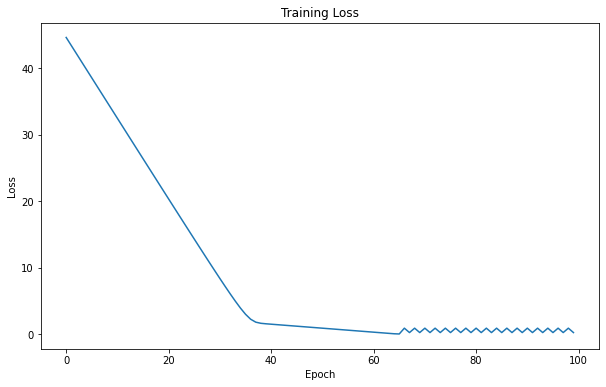

In [203]:
plt.figure(figsize=(10,6))
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')